# Laptop Price Analysis: Exploratory Data Analysis (EDA)

**Objective:** This notebook focuses on exploring the cleaned laptop dataset to uncover patterns, understand variable distributions, and identify relationships between features. The insights gained here will inform future feature selection and modeling efforts.

**Dataset:** This analysis uses the `cleaned_laptops.csv` file, which is the output of the data cleaning and preprocessing notebook.

## 1. Load Data and Libraries

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the cleaned dataset
# Note: You may need to adjust the file path.
df = pd.read_csv('../data/processed/cleaned_laptops.csv')

print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,Model,Manufacturer,Price_USD,Rating,OS_Clean,Processor_Manufacturer,Processor_Generation,Core_Count,Thread_Count,RAM_GB,...,Storage_GB,Storage_Type,Graphics_Manufacturer,Graphics_Type,Graphics_Memory_GB,Screen_Size_inches,Resolution_Width,Resolution_Height,Touchscreen,Warranty_Years
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,604.79,70.0,Windows,AMD,5.0,6.0,12.0,8.0,...,512,SSD,AMD,Dedicated,4.0,15.6,1920.0,1080.0,True,1.0
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,TECNO,287.88,56.0,Windows,INTEL,11.0,2.0,4.0,8.0,...,512,SSD,INTEL,Integrated,0.0,15.6,1920.0,1080.0,False,1.0
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,LENOVO,323.87,55.0,Windows,AMD,7.0,4.0,8.0,8.0,...,512,SSD,AMD,Integrated,0.0,15.6,1920.0,1080.0,False,1.0
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,SAMSUNG,839.88,60.0,Windows,INTEL,12.0,12.0,16.0,16.0,...,512,SSD,INTEL,Integrated,0.0,13.3,1080.0,1920.0,False,1.0
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,XIAOMI,1235.88,78.0,Windows,INTEL,14.0,24.0,32.0,16.0,...,1000,SSD,NVIDIA,Dedicated,8.0,16.1,2560.0,1600.0,False,1.0


## 2. Univariate Analysis (Analyzing Single Variables)

We'll start by examining the distribution of individual features to understand their characteristics.

### 2.1. Distribution of Laptop Prices

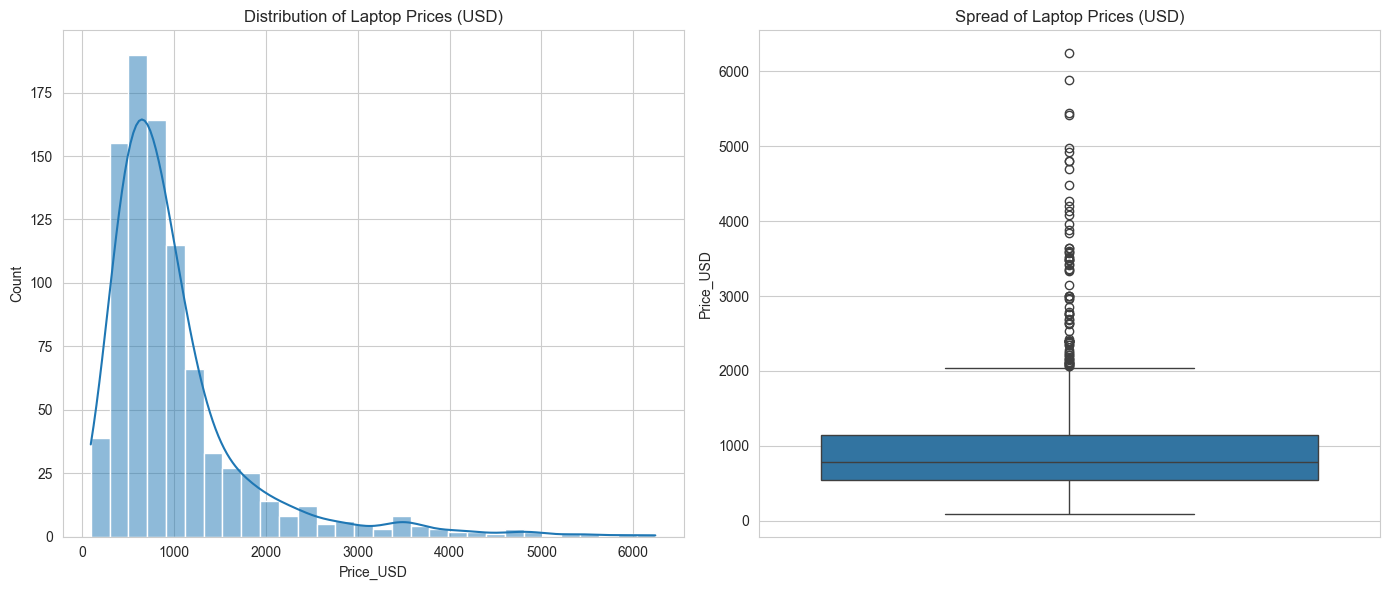

In [238]:
# Set a professional style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Histogram for Price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Price_USD'], kde=True, bins=30)
plt.title('Distribution of Laptop Prices (USD)')

# Box plot to see price spread and outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price_USD'])
plt.title('Spread of Laptop Prices (USD)')

plt.tight_layout()
plt.show()

**Observation:** The price is right-skewed, meaning most laptops are in the lower to mid-price range, with a few high-priced outliers.

### 2.2. Frequency of Laptop Manufacturers

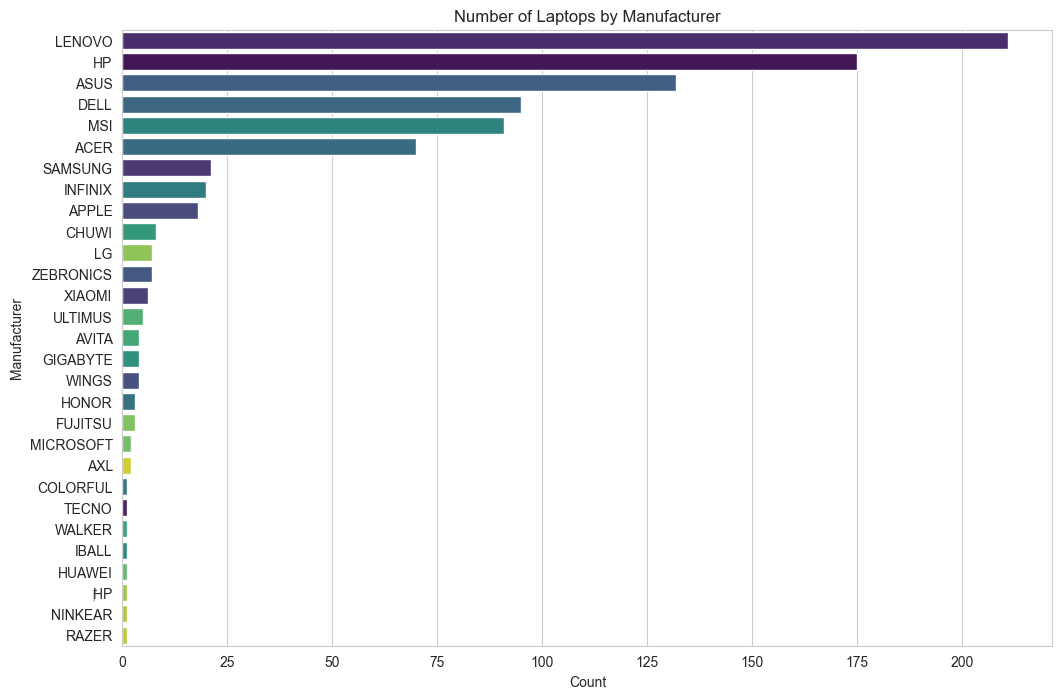

In [239]:
plt.figure(figsize=(12, 8))
# Added hue and legend=False to resolve the FutureWarning
sns.countplot(y='Manufacturer', order = df['Manufacturer'].value_counts().index, palette='viridis', data=df, hue='Manufacturer', legend=False)
plt.title('Number of Laptops by Manufacturer')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

**Observation:** HP, LENOVO, and ASUS are the most common manufacturers in this dataset.

## 3. Bivariate Analysis (Analyzing Relationships)

Now we'll explore how different features relate to each other, with a focus on how they might influence the laptop's rating and price.

### 3.1. Rating vs. Price

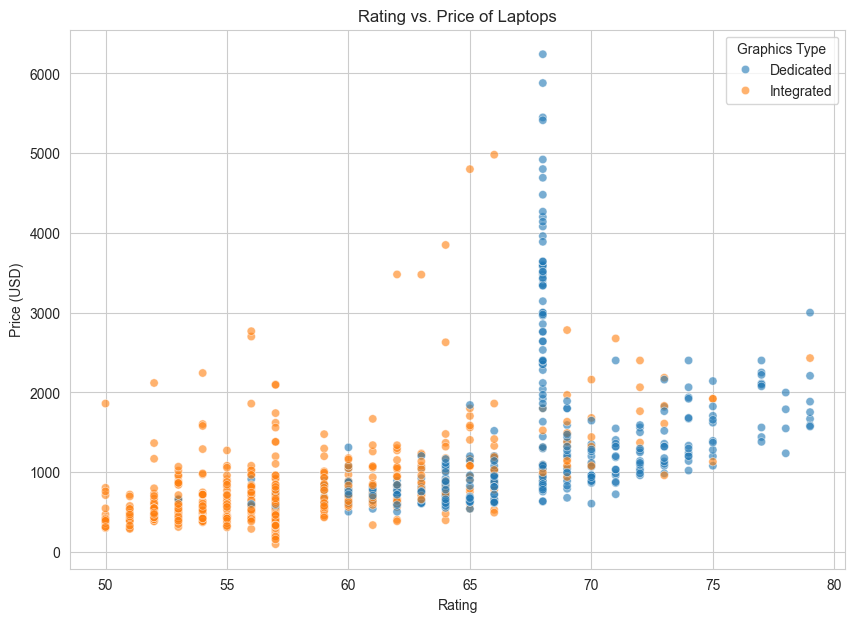

In [240]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Rating', y='Price_USD', data=df, alpha=0.6, hue='Graphics_Type')
plt.title('Rating vs. Price of Laptops')
plt.xlabel('Rating')
plt.ylabel('Price (USD)')
plt.legend(title='Graphics Type')
plt.show()

**Observation:** There is a clear positive correlation between price and rating. Laptops with dedicated graphics cards tend to have both higher ratings and higher prices.

### 3.2. Price by Processor Manufacturer

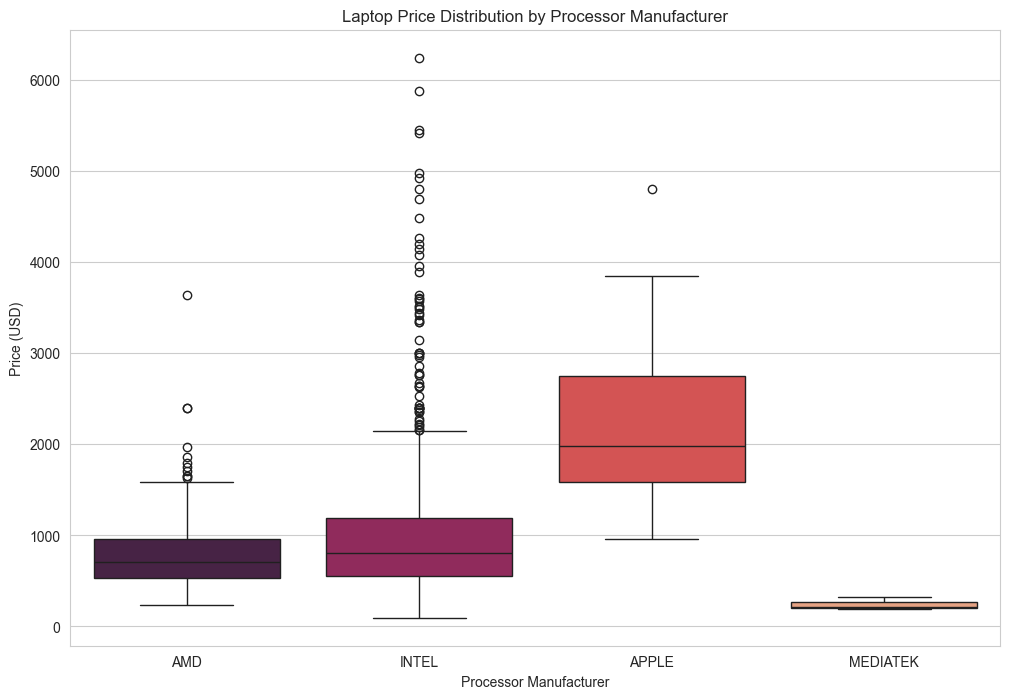

In [241]:
plt.figure(figsize=(12, 8))
# Added hue and legend=False to resolve the FutureWarning
sns.boxplot(x='Processor_Manufacturer', y='Price_USD', data=df, palette='rocket', hue='Processor_Manufacturer', legend=False)
plt.title('Laptop Price Distribution by Processor Manufacturer')
plt.xlabel('Processor Manufacturer')
plt.ylabel('Price (USD)')
plt.show()

**Observation:** Laptops with APPLE processors have a significantly higher median price and a tighter price range compared to others. INTEL and AMD have a much wider range of prices.

## 4. Deeper Analysis and Hypothesis Testing

### 4.1. Multivariate Analysis: Pairplot

A pairplot allows us to see both the distribution of single variables and the relationships between multiple variables at once. It's excellent for a high-level overview.

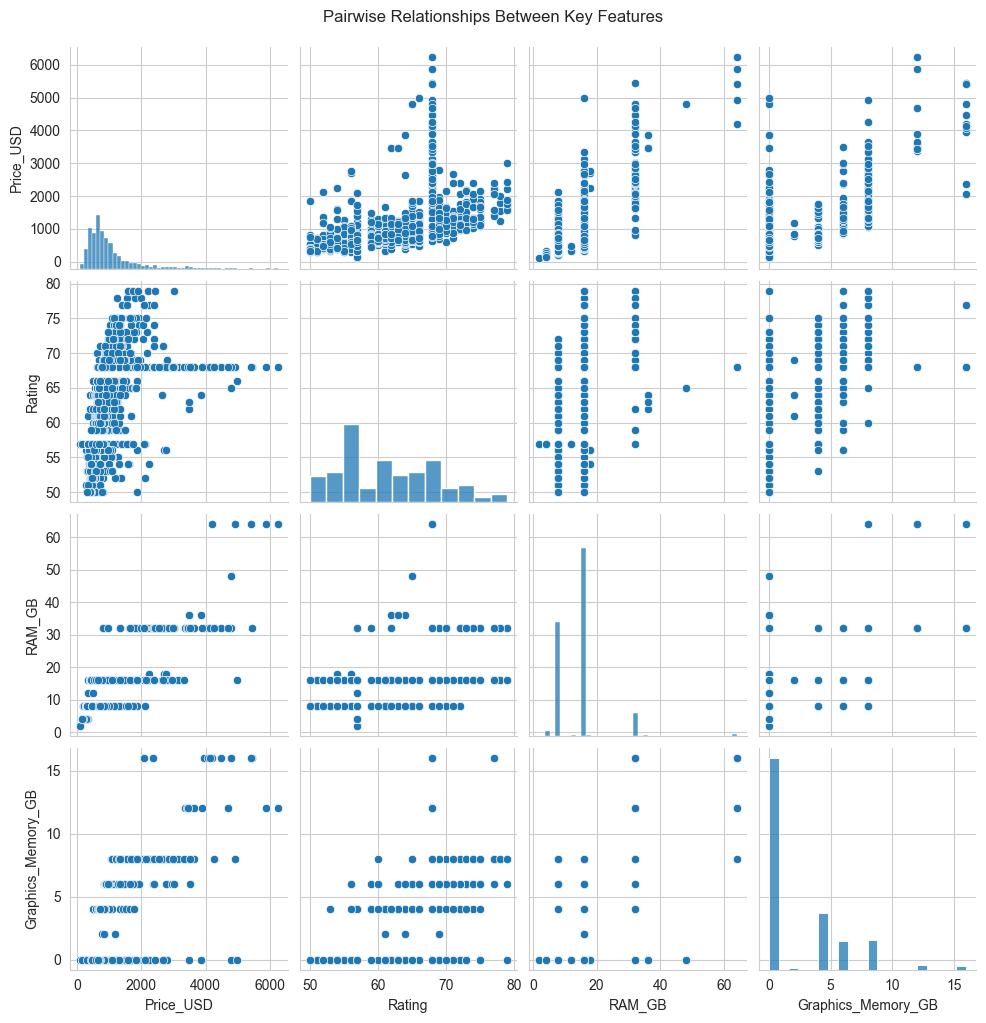

In [242]:
# Select key numerical features for the pairplot
pairplot_features = ['Price_USD', 'Rating', 'RAM_GB', 'Graphics_Memory_GB']

sns.pairplot(df[pairplot_features], height=2.5)
plt.suptitle('Pairwise Relationships Between Key Features', y=1.02)
plt.show()

**Observation:** The pairplot reinforces our earlier findings. We can clearly see the positive correlations between Price, Rating, RAM, and Graphics Memory. The histograms on the diagonal confirm the distributions we saw in the univariate analysis.

### 4.2. Hypothesis Testing: Price Difference Between Manufacturers

Our boxplot suggested that prices differ between manufacturers. We can use an ANOVA (Analysis of Variance) test to determine if this difference is statistically significant.

**Null Hypothesis (H0):** The mean price is the same across all top manufacturers.
**Alternative Hypothesis (H1):** At least one manufacturer has a different mean price.

In [243]:
# Select the top 4 manufacturers for a focused test
top_manufacturers = df['Manufacturer'].value_counts().nlargest(4).index
df_top_mfg = df[df['Manufacturer'].isin(top_manufacturers)]

# Create a list of price arrays for each manufacturer
price_groups = [df_top_mfg['Price_USD'][df_top_mfg['Manufacturer'] == mfg] for mfg in top_manufacturers]

# Perform ANOVA test
f_stat, p_val = stats.f_oneway(*price_groups)

print(f"ANOVA Test for Price Difference Between Top Manufacturers")
print("-"*60)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("\nConclusion: We reject the null hypothesis. There is a statistically significant difference in prices.")
else:
    print("\nConclusion: We fail to reject the null hypothesis. There is no statistically significant difference in prices.")

ANOVA Test for Price Difference Between Top Manufacturers
------------------------------------------------------------
F-statistic: 6.80
P-value: 0.0002

Conclusion: We reject the null hypothesis. There is a statistically significant difference in prices.


### 4.3. New Feature Engineering: Price per GB of RAM

Creating new features can sometimes reveal hidden patterns. Let's see if looking at the 'value' of RAM (price per GB) shows anything interesting.

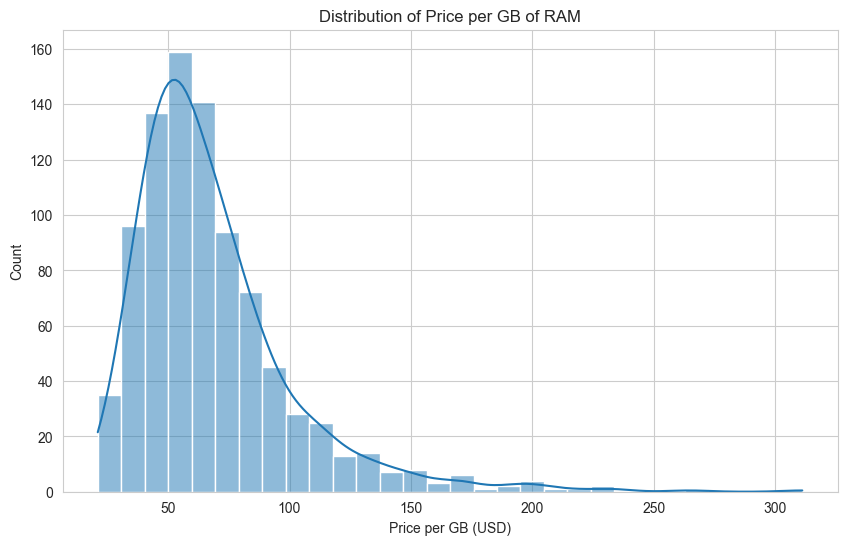

In [244]:
# Create the new feature
df['Price_per_GB_RAM'] = df['Price_USD'] / df['RAM_GB']

# Plot its distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_per_GB_RAM'], kde=True, bins=30)
plt.title('Distribution of Price per GB of RAM')
plt.xlabel('Price per GB (USD)')
plt.show()

**Observation:** This feature is also right-skewed. It suggests that while most laptops offer a certain 'value' for their RAM, some high-end or specialized models have a much higher cost associated with each gigabyte of RAM, likely due to other premium components.

## 5. Conclusion and Next Steps

This initial EDA reveals several key patterns:
- **Price and Rating are strongly linked**, with high-performance components like dedicated graphics cards driving both up.
- The **choice of manufacturer and processor** significantly impacts the price range of laptops, a finding that is statistically significant.
- Creating **new features** like `Price_per_GB_RAM` can provide different perspectives on the data.

**Next Steps:**
- **Deeper Multivariate Analysis:** Use more advanced plots like heatmaps of correlation matrices to visualize relationships between all numeric variables.
- **Targeted Hypothesis Testing:** Test other hypotheses, such as whether touchscreen laptops have a significantly different average rating.
- **Modeling:** With these insights, we can now move on to building regression models to predict `Price_USD` based on the most influential features we've identified.

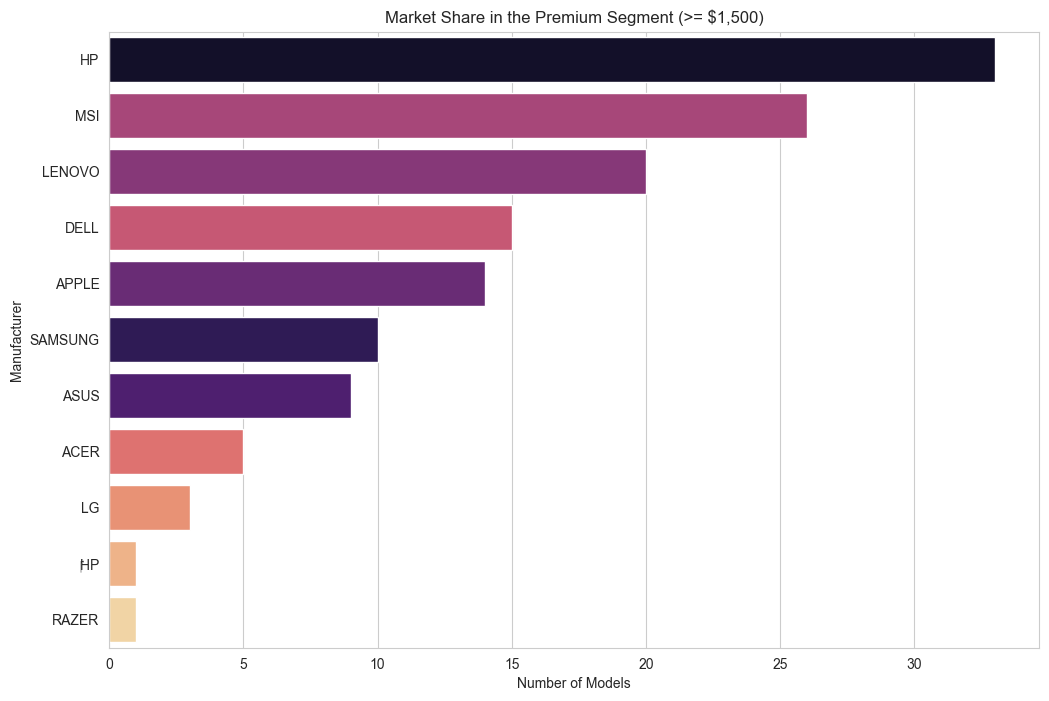

In [245]:
# Create a new dataframe for the premium segment
premium_df = df[df['Price_USD'] >= 1500].copy()

plt.figure(figsize=(12, 8))
sns.countplot(y='Manufacturer', data=premium_df, order=premium_df['Manufacturer'].value_counts().index, palette='magma', hue='Manufacturer', legend=False)
plt.title('Market Share in the Premium Segment (>= $1,500)')
plt.xlabel('Number of Models')
plt.ylabel('Manufacturer')
plt.show()

In [246]:
# Analyze the average specs for the top 5 premium manufacturers
top_premium_mfg = premium_df['Manufacturer'].value_counts().nlargest(8).index
premium_summary = premium_df[premium_df['Manufacturer'].isin(top_premium_mfg)]

# Group by manufacturer and calculate mean specs
premium_spec_avg = premium_summary.groupby('Manufacturer')[['Rating', 'RAM_GB', 'Graphics_Memory_GB', 'Price_USD']].mean().sort_values('Price_USD', ascending=False)

print("Average Specifications in the Premium Segment")
print(premium_spec_avg)

Average Specifications in the Premium Segment
                 Rating     RAM_GB  Graphics_Memory_GB    Price_USD
Manufacturer                                                       
DELL          71.066667  27.733333            8.666667  3156.360000
MSI           69.807692  32.307692            9.000000  3024.527308
APPLE         57.142857  19.571429            0.000000  2574.842143
HP            70.454545  22.303030            6.424242  2431.392424
LENOVO        70.950000  23.600000            8.000000  2371.896500
ASUS          69.555556  21.333333            6.000000  2171.892222
ACER          73.400000  19.200000            8.000000  1967.686000
SAMSUNG       67.200000  19.200000            0.000000  1908.972000


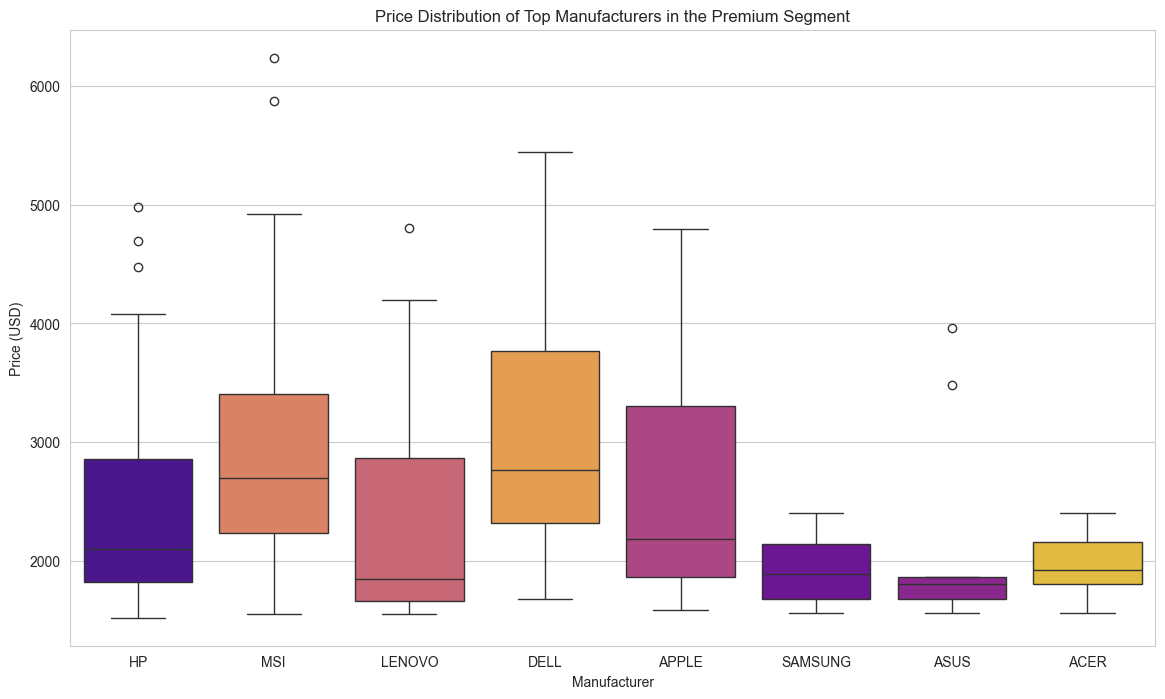

In [247]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Manufacturer', y='Price_USD', data=premium_summary, palette='plasma', order=top_premium_mfg, hue='Manufacturer', legend=False)
plt.title('Price Distribution of Top Manufacturers in the Premium Segment')
plt.xlabel('Manufacturer')
plt.ylabel('Price (USD)')
plt.show()

C:\Users\reefe\AppData\Local\Temp\ipykernel_19680\860061534.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\reefe\AppData\Local\Temp\ipykernel_19680\860061534.py:21: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\reefe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
C:\Users\reefe\AppData\Local\Temp\ipykernel_19680\860061534.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Market Tier', bbox_to_anchor=(1.05

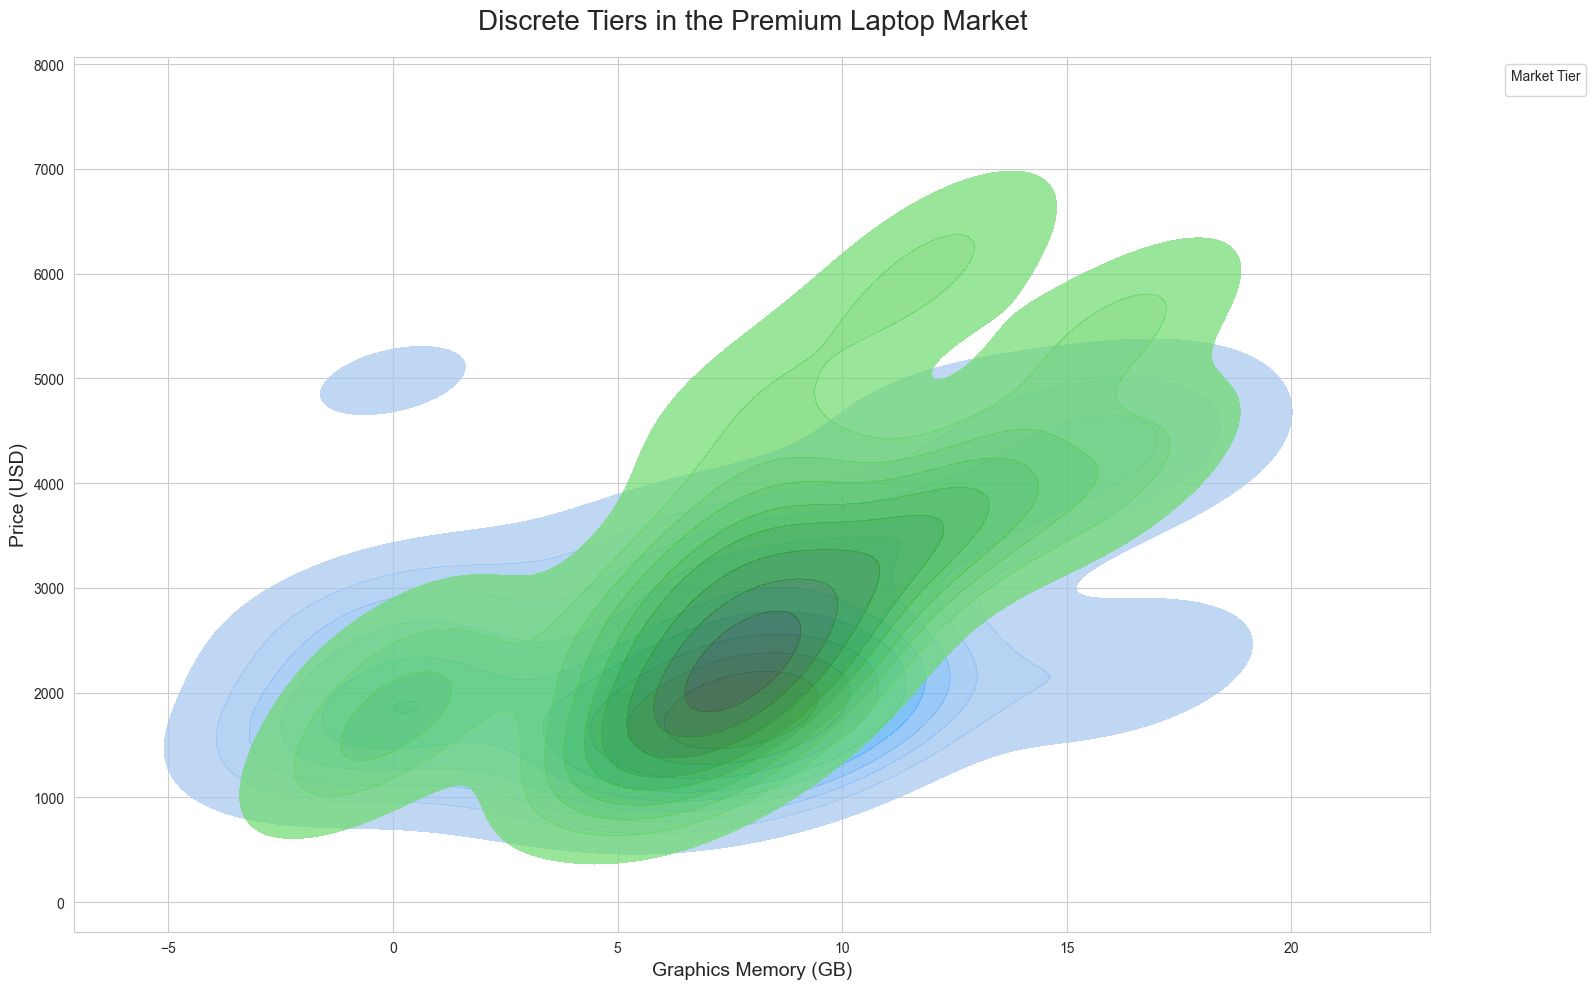

In [248]:
# --- 5.4. Visualizing the Premium Market Tiers ---

# First, let's categorize the top 8 premium manufacturers into the tiers we identified.
def assign_tier(manufacturer):
    if manufacturer in ['MSI', 'ASUS', 'DELL']:
        return 'Performance-at-all-Costs'
    elif manufacturer in ['APPLE', 'SAMSUNG']:
        return 'Premium Ecosystem'
    else: # HP, LENOVO, ACER
        return 'Accessible Premium'

# Create a dataframe of the top 8 premium manufacturers
top_premium_mfg = premium_df['Manufacturer'].value_counts().nlargest(8).index
premium_summary_df = premium_df[premium_df['Manufacturer'].isin(top_premium_mfg)].copy()

# Add the 'Tier' column
premium_summary_df['Tier'] = premium_summary_df['Manufacturer'].apply(assign_tier)

# Create the scatter plot
plt.figure(figsize=(16, 10))
sns.kdeplot(
    data=premium_summary_df,
    x='Graphics_Memory_GB',
    y='Price_USD',
    hue='Tier',
    #size='Rating',
    #sizes=(50, 500), # Control the range of dot sizes
    alpha=0.7,
    #jitter=0.2,
    cmap='Spectral',
    shade=True,
    palette='tab10'
)

plt.title('Discrete Tiers in the Premium Laptop Market', fontsize=20, pad=20)
plt.xlabel('Graphics Memory (GB)', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(title='Market Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

